2023-06-25 13:17:55.627494: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-25 13:17:55.628716: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 13:17:55.650937: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 13:17:55.651369: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 13:17:56.152970: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

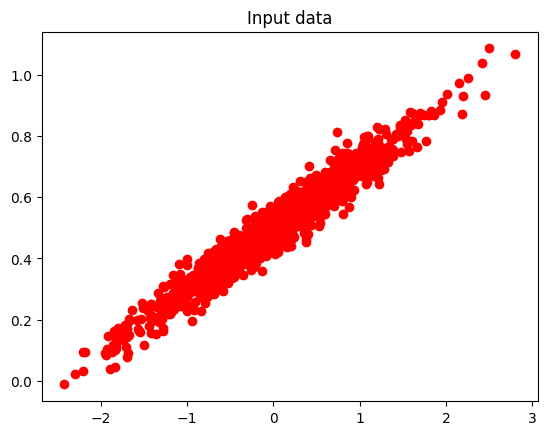

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.optimizers import SGD

num_points = 1200
m = 0.2
c = 0.5
x_data = np.random.normal(0.0, 0.8, num_points)
noise = np.random.normal(0.0, 0.04, num_points)
y_data = m * x_data + c + noise 

plt.figure()
plt.plot(x_data, y_data, 'ro')
plt.title('Input data')
plt.show()

ITERATION 1
W = 0.14241973
b = 0.45504412
loss = 0.06855224072933197


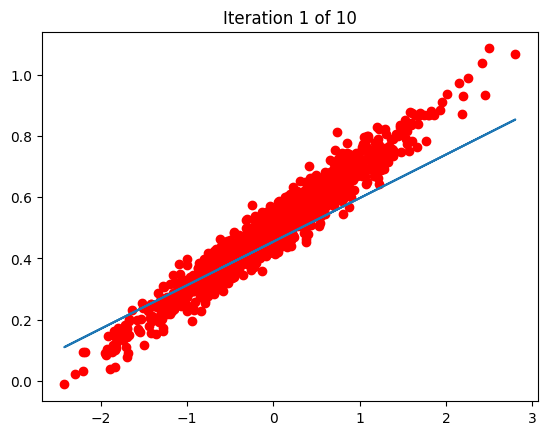

ITERATION 2
W = 0.19051553
b = 0.49515083
loss = 0.0026354030705988407


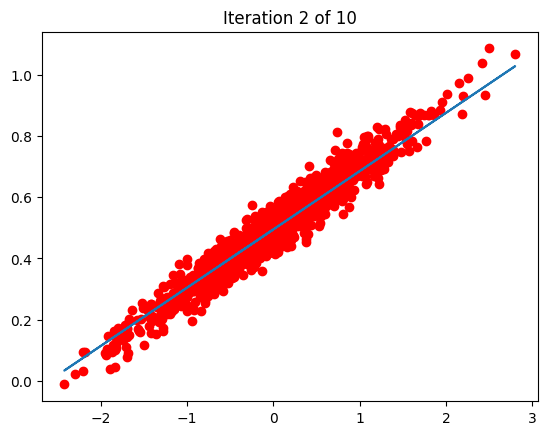

ITERATION 3
W = 0.20014168
b = 0.49877667
loss = 0.0015943278558552265


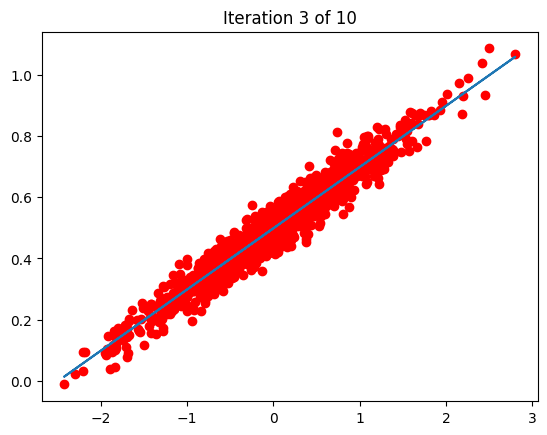

ITERATION 4
W = 0.2020212
b = 0.49715564
loss = 0.0015679809730499983


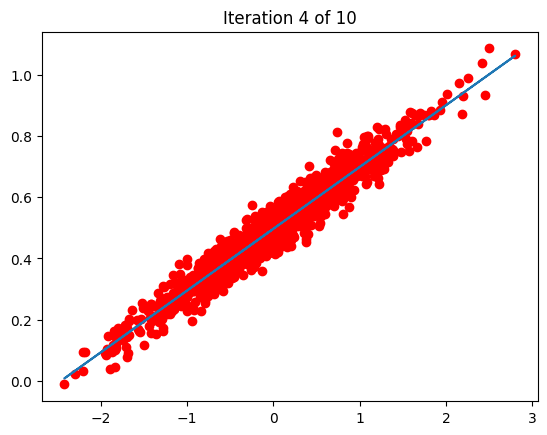

ITERATION 5
W = 0.20197366
b = 0.4968476
loss = 0.00156762998085469


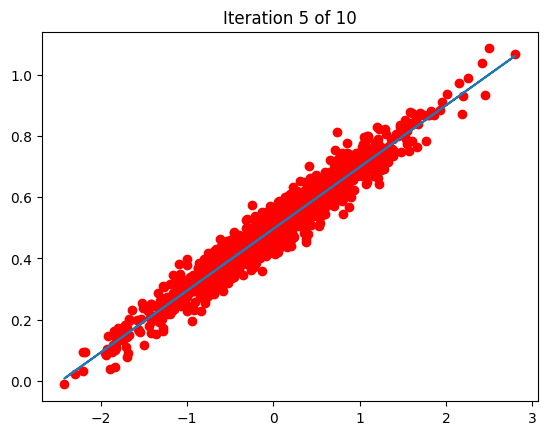

ITERATION 6
W = 0.20271572
b = 0.49793214
loss = 0.0015675168251618743


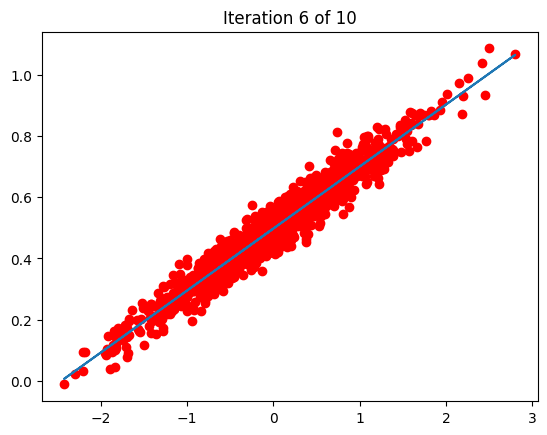

ITERATION 7
W = 0.20299415
b = 0.49788523
loss = 0.0015680278884246945


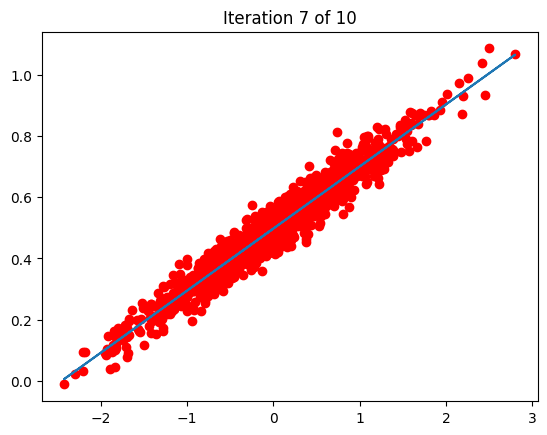

ITERATION 8
W = 0.20266803
b = 0.49880654
loss = 0.0015673052985221148


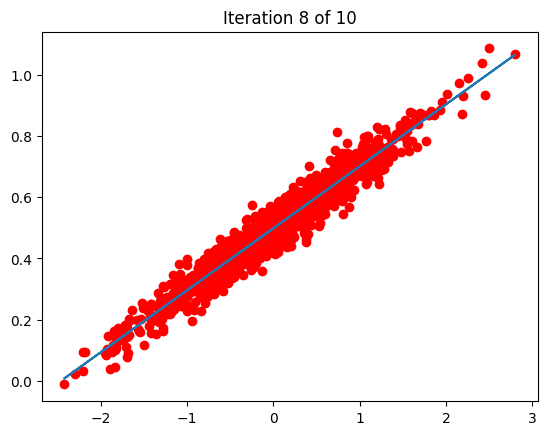

ITERATION 9
W = 0.2026219
b = 0.49705997
loss = 0.0015665445243939757


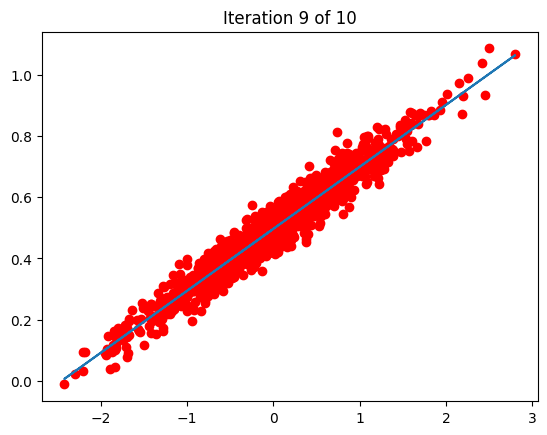

ITERATION 10
W = 0.20214902
b = 0.49907342
loss = 0.0015652263537049294


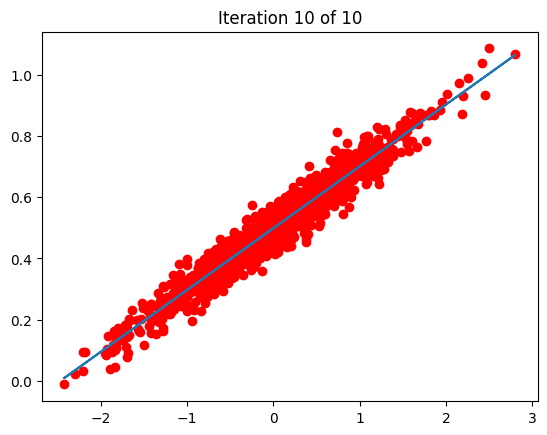

In [3]:
num_iterations = 10

class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs):
        W = self.model.get_weights()[0][0][0]
        b = self.model.get_weights()[1][0]
        print('ITERATION', epoch+1)
        print('W =', W)
        print('b =', b)
        print('loss =', logs.get('loss'))
        plt.figure()
        plt.plot(x_data, y_data, 'ro')
        plt.plot(x_data, W * x_data + b)
        plt.title('Iteration ' + str(epoch+1) + ' of ' + str(num_iterations))
        plt.show()

model = Sequential([
    Dense(1, activation='linear', input_shape=(1,),
          kernel_initializer=RandomUniform(-1.0, 1.0))
])
model.compile(loss='mse', optimizer=SGD(0.001))

history = model.fit(x_data, y_data, batch_size=1, epochs=num_iterations,
                    verbose=0, callbacks=[MyCallback()])